# Prediction using Decision Tree  Algorithm :

### Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv('Iris.csv',index_col='Id')
df.reset_index(drop=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [8]:
df['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3},inplace=True)

In [9]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [10]:
df['Species'].unique()

array([1, 2, 3], dtype=int64)

## Data Visualization

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

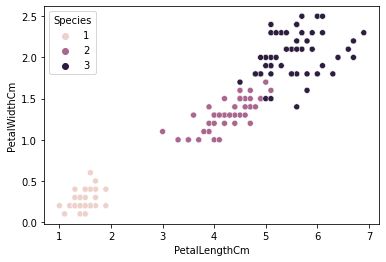

In [11]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

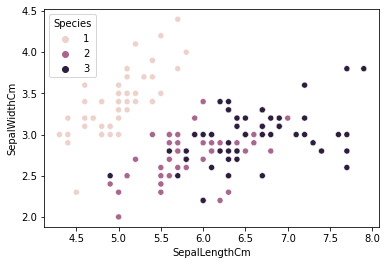

In [12]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')


Text(69.0, 0.5, 'Actual')

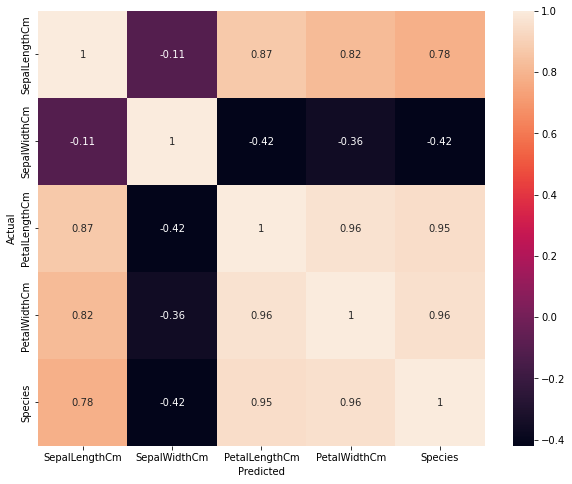

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 1.0, 'Count')

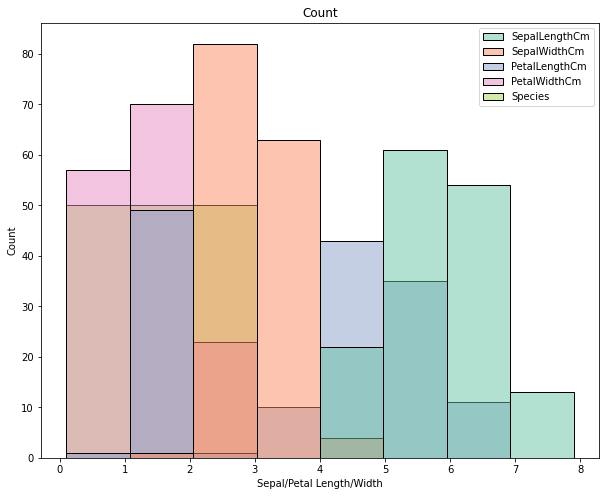

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,bins=8,palette='Set2')
plt.xlabel('Sepal/Petal Length/Width')
plt.title('Count')

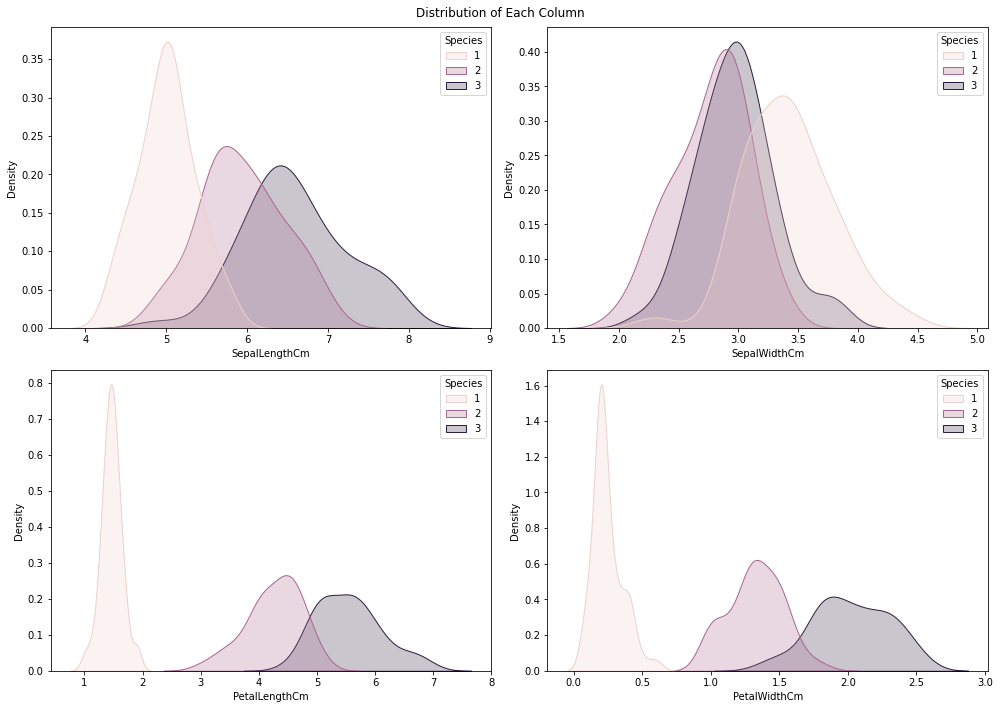

In [15]:
fig,axes = plt.subplots(figsize=(14,10),nrows=2,ncols=2)

plt.suptitle('Distribution of Each Column')
sns.kdeplot(data=df,x='SepalLengthCm',hue='Species',shade=True,ax=axes[0][0])
sns.kdeplot(data=df,x='SepalWidthCm',hue='Species',shade=True,ax=axes[0][1])
sns.kdeplot(data=df,x='PetalLengthCm',hue='Species',shade=True,ax=axes[1][0])
sns.kdeplot(data=df,x='PetalWidthCm',hue='Species',shade=True,ax=axes[1][1])
plt.tight_layout()
plt.show()

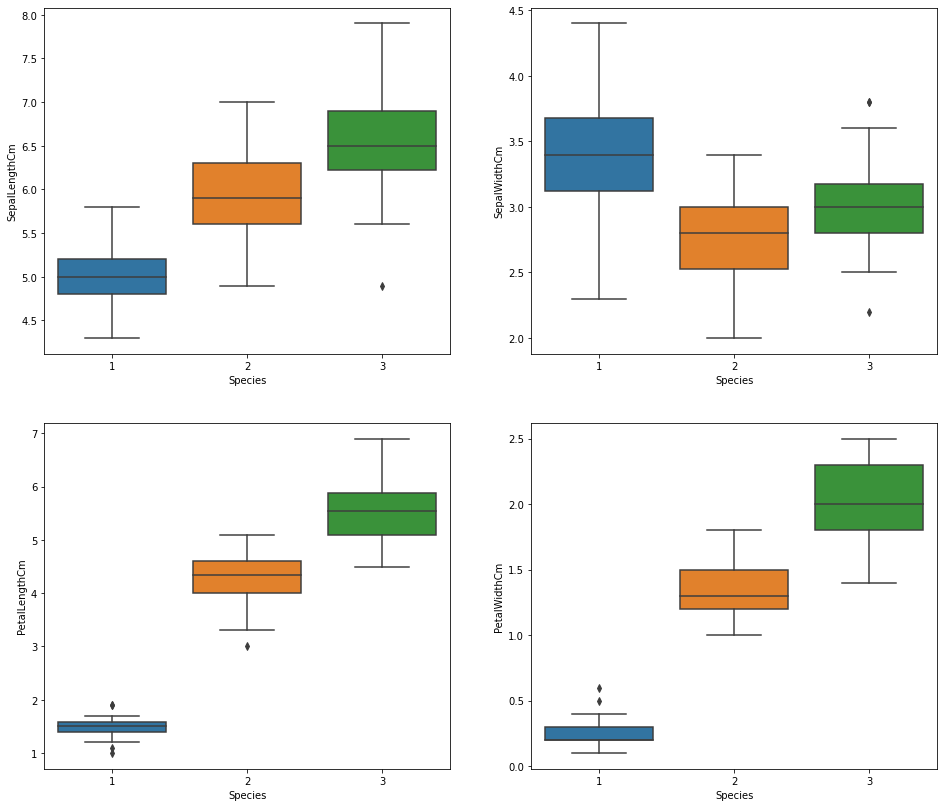

In [16]:
fig,axes = plt.subplots(figsize=(16,14),nrows=2,ncols=2)
sns.boxplot(x='Species',y='SepalLengthCm',data=df,ax=axes[0][0])
sns.boxplot(x='Species',y='SepalWidthCm',data=df,ax=axes[0][1])
sns.boxplot(x='Species',y='PetalLengthCm',data=df,ax=axes[1][0])
sns.boxplot(x='Species',y='PetalWidthCm',data=df,ax=axes[1][1])
plt.show()

# Logistic Regression

In [17]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Decision Tree Classifier

In [18]:
X = df.drop('Species',axis=1)

In [19]:
y = df['Species']

In [20]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [21]:
y

Id
1      1
2      1
3      1
4      1
5      1
      ..
146    3
147    3
148    3
149    3
150    3
Name: Species, Length: 150, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [23]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
75,6.4,2.9,4.3,1.3
89,5.6,3.0,4.1,1.3
97,5.7,2.9,4.2,1.3
43,4.4,3.2,1.3,0.2
135,6.1,2.6,5.6,1.4
...,...,...,...,...
64,6.1,2.9,4.7,1.4
71,5.9,3.2,4.8,1.8
82,5.5,2.4,3.7,1.0


In [24]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
34,5.5,4.2,1.4,0.2
17,5.4,3.9,1.3,0.4
44,5.0,3.5,1.6,0.6
130,7.2,3.0,5.8,1.6
51,7.0,3.2,4.7,1.4


In [25]:
y_test

Id
34     1
17     1
44     1
130    3
51     2
124    3
69     2
54     2
147    3
2      1
148    3
33     1
32     1
123    3
128    3
Name: Species, dtype: int64

In [26]:
y_train

Id
75     2
89     2
97     2
43     1
135    3
      ..
64     2
71     2
82     2
12     1
96     2
Name: Species, Length: 135, dtype: int64

In [27]:
model = DecisionTreeClassifier()

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([1, 1, 1, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3], dtype=int64)

### Accuracy

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
conf = confusion_matrix(y_test,y_pred)

In [33]:
conf

array([[6, 0, 0],
       [0, 3, 0],
       [0, 1, 5]], dtype=int64)

<AxesSubplot:>

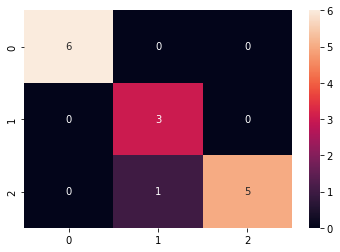

In [34]:
sns.heatmap(data=conf,annot=True)

In [35]:
model.score(X_test,y_test)*100

93.33333333333333

In [36]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.9333333333333333


## Perform Evaluation on Test set

In [37]:
# Classification Report
clr = classification_report(y_test,y_pred)

In [38]:
print(clr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



## Visualize Decision Tree

In [41]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [43]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [44]:
from sklearn.externals.six import StringIO  

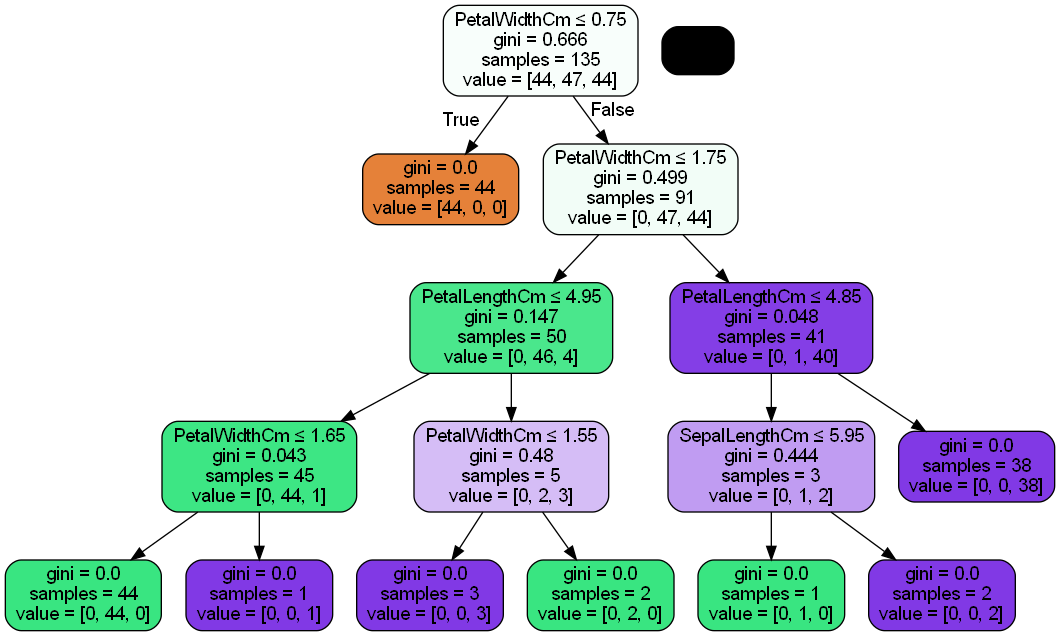

In [56]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=df.columns.drop('Species'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [57]:
model.predict([[4.8, 2.9, 1.3, 0.2]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)